# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Importing modules to be used in the analysis
import visuals as vs
import visuals_300 as vs3
import pandas as pd
import numpy as np  
import os
import ast
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from __future__ import division


# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab is only changing its location at the beginging of each trial, but not moving at all during the trial. The red light and green light alternate every two seconds or so at each intersection. The driving agent is getting positive rewards for idling at red light, and negative rewards for idling at green light without oncoming traffic. The reward appears to be real values but not entirely sure how they are determined.    




### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

1) In `agent.py` file, there are four flags, `update_delay, display, log_metrics`, and `optimized`, that can be set for the simulation. When any positive number is chosen for `updated_delay`, the times in seconds between actions(steps) are changed for that number. When `display` is set to `True`, PyGame GUI is enabled. By setting `log_metrics` to `True`, trial results log files are saved in both csv and table format. In doing so, either improved learning log with optimized parameters or default learning log with un-optimized parameters are saved depending on the `optimized` flag. 

2) In the environment.py Python file, when an agent has taken an action, the function `act` is called to assess the action and give corresponding rewards.  

3) In the simulator.py Python file, `render_text` function is to display simulation data in the terminal/ command prompt, while `render` displays them on PyGame GUI. 

4) In the `planner.py` file, the `next_waypoint`() function first checks if the destination is East or West of the agent's location and then considers North-South direction. 



-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


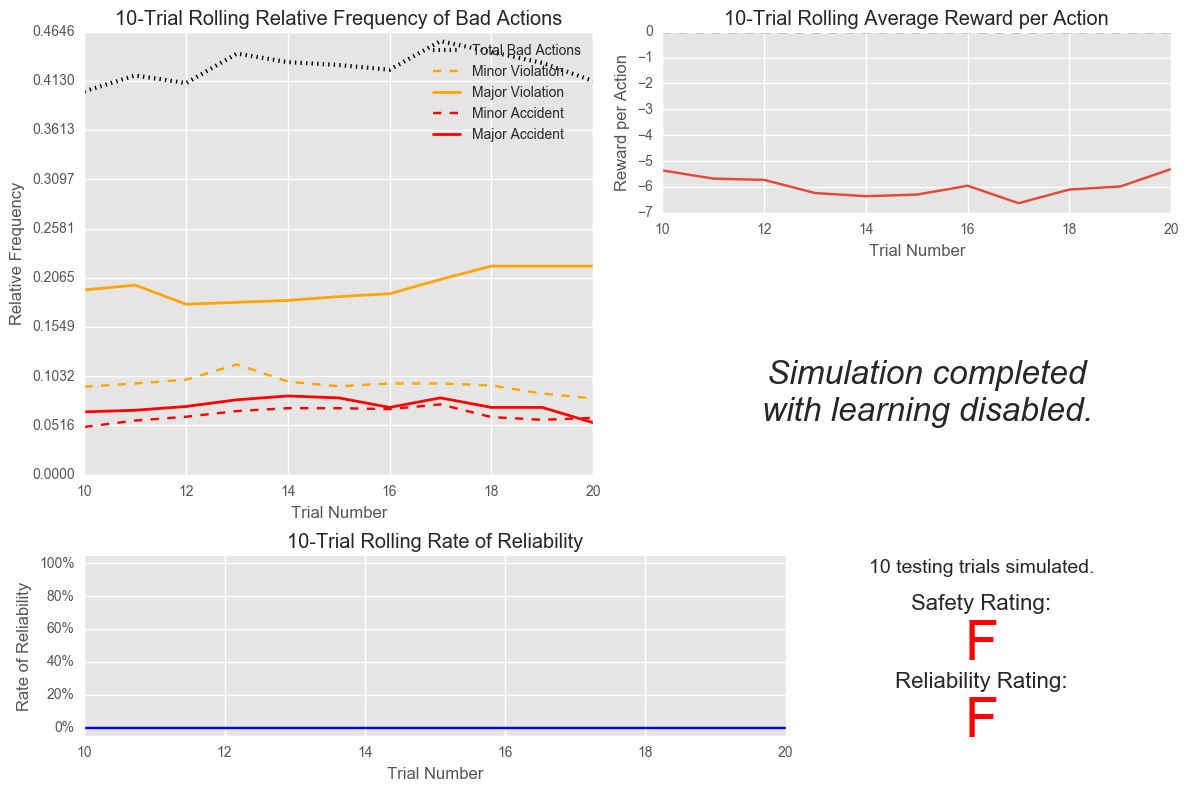

In [156]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

1) The 10-trial rolling relative frequency of bad actions plot on the upper left pane shows that the agent made bad decision about 40% of the time. The average minor accidents remained near 5% and the frequency of the major accidents were a little bit higher, 7%. 

2) The 10-trial rolling rate of reliability stayed at 0% during the 20 training trials, hence the reliability rating grade F. This result is consistent with the randomness of agent's action choice because a) the agent is not learning and b) the agent does not consider the best route from the starting point to destination at all.    

3) The average reward given to the agent during the training trials moves between -5 and -7.

4) The outcome of results did not change significantly as the number of trials increases. The plots show no upward or downward trend. This is because we haven't specified the agent's decision rule yet, thus the agent isn't learning. 

5) Given the high chances of traffic violation and accidents, moreover, the striking 0% of average success rate, the basic driving agent who chooses action randomly is neither reliable nor safe. 


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

Safety rating is based on how frequently the agent makes traffic violations and whether it causes either major or minor accidents during test trials. The intersection **inputs** are most relevant in learning this safety. The first element of inputs of sensor data, traffic lights which is a alternating boolean of green and red, solely determines traffic violation, thus one of most important features in the environment. Additionally, other elements in the inputs, how cars in the left, right, and front of our agent are moving can affect possible accidents. For example, the car on the agent's left is moving forward and our agent attempts to turn right, then it causes minor traffic violation and accidents. 

The **waypoint** is an important feature in learning reliability. The waypoints are set so that the agents is able to choose action based on the current location and intended location. Whether the agent follows the waypoint or not will affect the final realibaility rating. 

Looking up the `environment.py`, the **deadline** is set as L1 distance from starting point to the destination multiplied by 5. If deadline in enforced, each trial ends when deadline reached. I don't think deadline is an appropriate feature for the state because it is not essential feature in the decision making of the agent. With the given grid size 8 * 6, it increases the size of state space by 70 times, a total of 26,880 states, which is pretty large. Also, think about this situation: The waypoint and sensor inputs are the same, but in one situation the dealine is 70 and in the other the deadline is 69. Do we want the agent to choose its action differently? The waypoint is 'forward' but the light is red and the cars on the left and right are moving forward. The optimal action we want the agent to choose is to wait, no matter what the deadline is.    The goal of ensuring the agent to get to the destination in timely manner is in fact implemented in Q(s, a), by adjusting penalty to rewards. 

In short, I chose two features, waypoint and inputs, to define a set of states.    




### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

 The waypoints of primary agent has three levels - `left`, `right`, and `forward`.  The traffic lights is boolean - `green` or `red`. The cars on the left, right, and oncoming directions all have four levels - `None`, `forward`, `right`, `left`. The combination of these features can be calculated as 3 \* 2 \* 4 \* 4 \* 4 = 384. Q-learning can learn the problem with millions of states so it looks like it can easily solve our problems.   

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

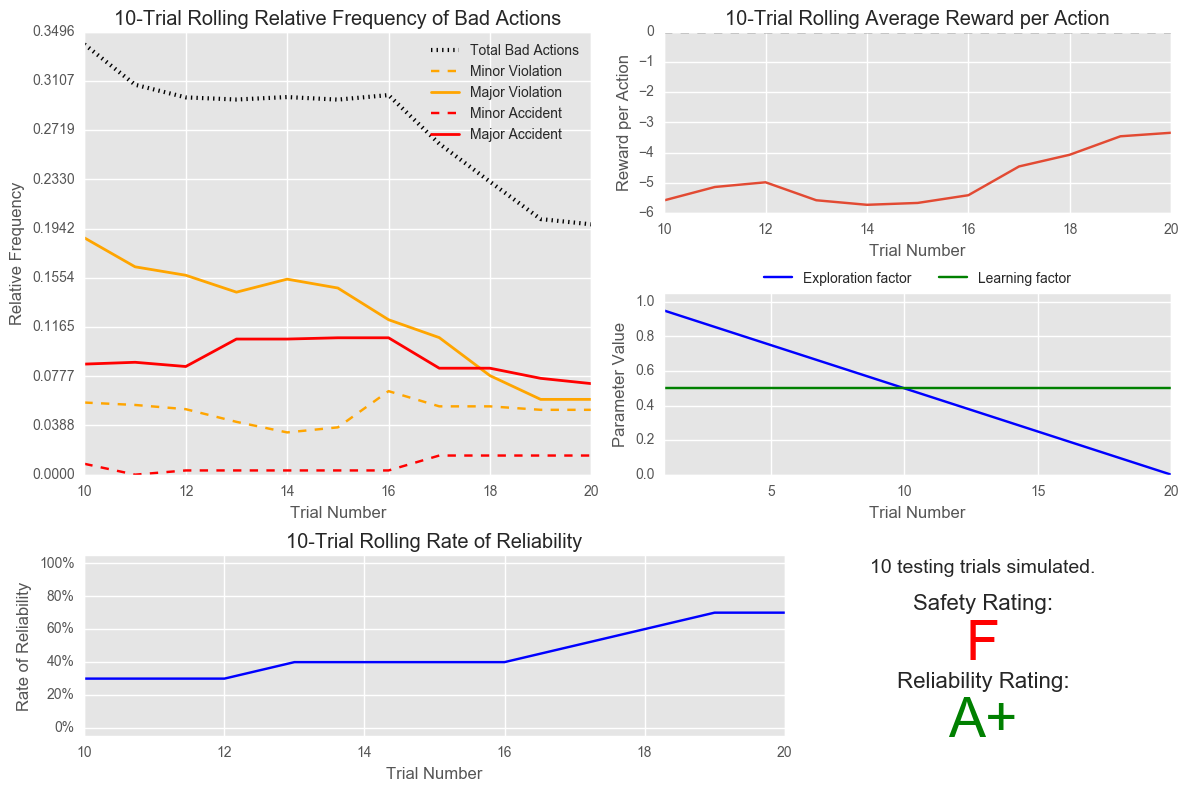

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

1) In the bad actions plot on the upper left panel, the relative frequency of total bad actions starts around 35% and keeps decreasing to 20% as the number of training trials increases. 

2) The average rewards at earlier trials start near -5.5, close to that of non-learning agent, then take off and keep increasing until -3.5, but stay negative during the training.   

3) The rate of reliability starts at 30% and keeps increasing until 70%. At the test trials, the success rate was 100%, hence the ration A+.  

4) The linearly decaying function of epsilon is well represented on the parameter plot in the middle plot on the right pane. It starts at 1.0 and reaches 0.0 at the 20th training trial and the slope is constant during the training at -0.05. 

5) The safety rating stayed the same, F, while the reliability rating got dramatically better, from F to A+. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

### 1) Decaying function for exploration factor epsilon

A total of five decaying functions are compared. Parameters a's are selected so that each decaying function converges to the default tolerance level (0.05) after about 2500 times of training trials. The maximum trial number 2500 was chosen so that our agent can visit each state enough.  

$$ \epsilon = 1 - .00038t $$

$$ \epsilon = .9988^t $$ 

$$ \epsilon = 1 / t^2 $$

$$ \epsilon = e^{-.0012t} $$

$$ \epsilon = Cos(.006083t) $$




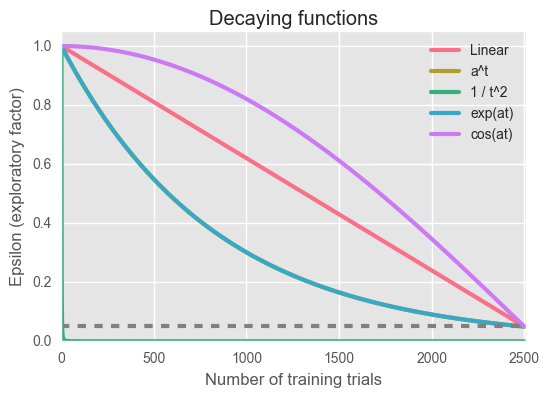

In [2]:
trials = np.arange(2500)

e_0 = [1 - 0.00038 * t for t in trials if 1 - 0.00038 * t > 0]
e_1 = [.9988 ** t for t in trials if .9988 ** t > 0]
e_2 = [1 / t ** 2 for t in trials]
e_3 = [np.exp(-0.0012 * t) for t in trials if np.exp(-0.0012 * t) > 0]
e_4 = [np.cos(0.00060831019 * t) for t in trials if np.cos(0.00060831019 * t) > 0]

eps_list = [e_0, e_1, e_2, e_3, e_4]
my_col = sns.color_palette("husl", 5)

for i, e in enumerate(eps_list):
    n = 2500 - len(e)
    e.extend(np.zeros(n))
    plt.plot(trials, e, linewidth = 3, color = my_col[i])
plt.xlim(-1, 2510)    
plt.ylim(0.0, 1.05)
plt.axhline(y = 0.05, linewidth = 3, linestyle = "--", color = "gray")
plt.title("Decaying functions")
plt.xlabel("Number of training trials")
plt.ylabel("Epsilon (exploratory factor)")
plt.legend(loc = "best", labels =  ["Linear", "a^t", "1 / t^2", "exp(at)","cos(at)"])  

** Figure ** Five decaying functions are plotted above. The third decaying function e = 1 / t^2 converges to 0 much earlier than 2500th trial. The rest four decaying functions converge to tolerance level (0.05) at around 2500th training trial. With the selected parameter a's, e = .9988^t and e = exp(-.0012t) behave almost the same. So we will compare three decaying functions, the linear,  convex (e = exp(-.0012t)), and concave (e = Cos(.006083t)) below. 

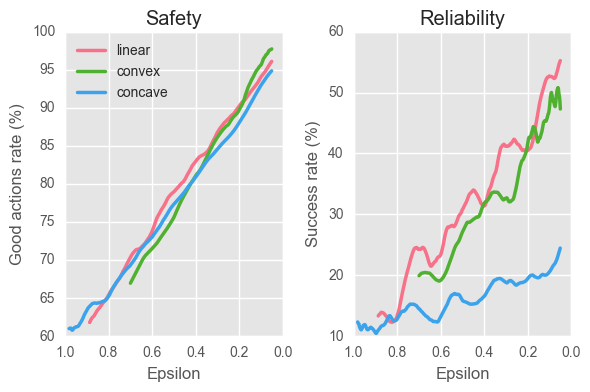

In [45]:
linear = pd.read_csv("logs/linear_sim_improved-learning.csv")
convex = pd.read_csv("logs/convex_sim_improved-learning.csv")
concave = pd.read_csv("logs/concave_sim_improved-learning.csv")

data_list = [linear, convex, concave]
safety_score = []
reliability_score = []

eps_list = []
for i, data in enumerate(data_list):
    data['good_actions'] = data['actions'].apply(lambda x: ast.literal_eval(x)[0])
    data['good'] = (data['good_actions'] * 100 / (data['initial_deadline'] - data['final_deadline'])).rolling(window = 100, center = False).mean()
    data['reliability'] = (data['success'] * 100).rolling(window = 100, center = False).mean()
    param = data['parameters'].apply(lambda x: ast.literal_eval(x)['e'])
    eps_list.append(param)
       
eps_list = pd.DataFrame(eps_list)

my_col = sns.color_palette("husl", 3)

plt.subplot(1, 2, 1)
for i, decay in enumerate(data_list):
    n = (eps_list.iloc[i] > 0.05).sum()
    plt.plot(eps_list.iloc[i][:n], decay['good'][:n].rolling(window = 200, center = False).mean(), color = my_col[i], linewidth = 2.5)
plt.xlim(1.0, 0.0)
plt.ylabel("Good actions rate (%)")
plt.xlabel("Epsilon")
plt.legend(loc = "best", labels = ["linear", "convex", "concave"])
plt.title("Safety")

plt.subplot(1, 2, 2)
for i, decay in enumerate(data_list):
    n = (eps_list.iloc[i] > 0.05).sum()
    plt.plot(eps_list.iloc[i][:n], decay['reliability'][:n].rolling(window = 200, center = False).mean(), color = my_col[i], linewidth = 2.5)
plt.xlim(1.0, 0.0)
plt.ylabel("Success rate (%)")
plt.xlabel("Epsilon")
plt.tight_layout()
plt.title("Reliability")

** Figure ** Simulation results (alpha = 0.5, n_training_trials = 2500) with three decaying functions are shown above. Note that X axis starts at 1.0 and decreases to 0.0. As our agent learns, good actions rate and success rate improve, but at different speed depending on the decaying function. Convex(e = exp(-.0012t) and linear function (e = 1 - .0038t) showed very silimar result on reliability, while the onvex decaying function appears to slightly outperforms other two on safety.     

### 2) Alpha (learning rate)

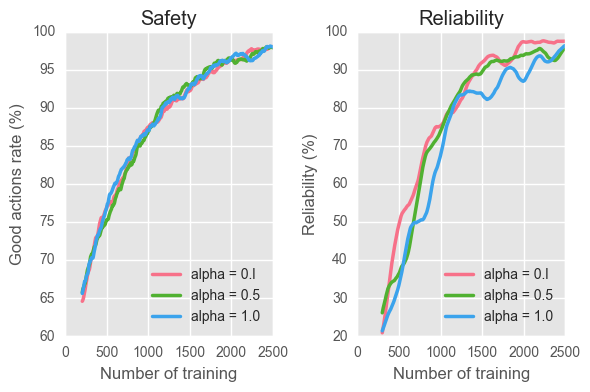

In [6]:
a_01 = pd.read_csv("logs/alpha_01_sim_improved-learning.csv")
a_05 = pd.read_csv("logs/alpha_05_sim_improved-learning.csv")
a_10 = pd.read_csv("logs/alpha_10_sim_improved-learning.csv")

alpha_list = [a_01, a_05, a_10]
safety_score = []
reliability_score = []

for i, data in enumerate(alpha_list):
    data['good_actions'] = data['actions'].apply(lambda x: ast.literal_eval(x)[0])
    data['good'] = (data['good_actions'] * 100 / (data['initial_deadline'] - data['final_deadline'])).rolling(window = 10, center = False).mean()
    data['reliability'] = (data['success'] * 100).rolling(window = 100, center = False).mean()

my_col = sns.color_palette("husl", 3)


plt.subplot(1, 2, 1)
for i, data in enumerate(alpha_list):
    training = data[data['testing'] == False]
    n = len(training)
    plt.plot(range(n), training['good'].rolling(window = 200, center = False).mean(), 
             color = my_col[i], linewidth = 2.5)
plt.xlabel('Number of training')
plt.ylabel("Good actions rate (%)")
plt.legend(loc = "best", labels = ["alpha = 0.l", "alpha = 0.5", "alpha = 1.0"])
plt.title("Safety")

plt.subplot(1, 2, 2)
for i, data in enumerate(alpha_list):
    training = data[data['testing'] == False]
    n = len(training)
    plt.plot(range(n), training['reliability'].rolling(window = 200, center = False).mean(), 
             color = my_col[i], linewidth = 2.5)
plt.xlabel('Number of training')
plt.ylabel("Reliability (%)")
plt.legend(loc = "best", labels = ["alpha = 0.l", "alpha = 0.5", "alpha = 1.0"])
plt.title("Reliability")

plt.tight_layout()

** Figure ** Simulation results from three different levels of learning rate are compared. The decaying function for exploration factor was convex function (e = exp(-.0012t)) and tolerance level was set to 0.05. Good actions rate plots were pretty similar. Reliability plot, on the other hand, shows some level of difference. It's hard to say conclusively about reliability because the simulation involves environmental randomness and each simulation ran only once. Looking at the plot, however, there seems to be a tendency that the agent with smaller learning rate reaches the higher level of reliability (and faster).     

### 3) Tolerance level 

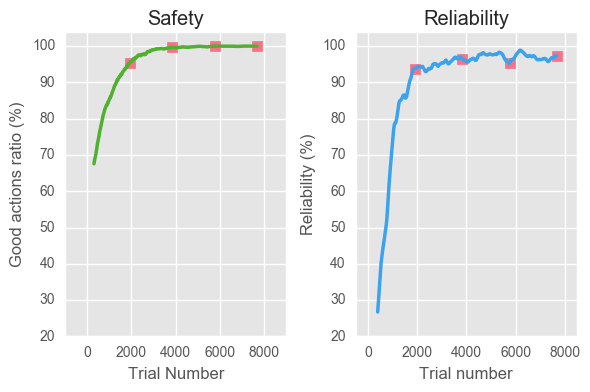

In [8]:
# Loading the sim results with tol = .0001 

data = pd.read_csv("logs/tol_0001_sim_improved-learning.csv")
data['good_actions'] = data['actions'].apply(lambda x: ast.literal_eval(x)[0])
data['good'] = (data['good_actions'] * 100 / (data['initial_deadline'] - data['final_deadline'])).rolling(window = 10, center = False).mean()
data['reliability'] = (data['success'] * 100).rolling(window = 100, center = False).mean()
training = data[data['testing'] == False]
data['epsilon'] = data['parameters'].apply(lambda x: ast.literal_eval(x)['e'])

tol_list = [.1, .01, .001, .0001]
n_trial_list = []

for tol in tol_list:
    small = data[data['epsilon'] >= tol]['trial']
    n_trial = len(small)
    n_trial_list.append(n_trial)
    
my_col = sns.color_palette("husl", 3)
plt.subplot(1, 2, 1)
plt.scatter(n_trial_list, training['good'].rolling(window = 300).mean()[n_trial_list], 
            color = my_col[0], marker = "s", s = 50)
plt.plot(training['trial'], training['good'].rolling(window = 300).mean(),
        linewidth = 2.5, color = my_col[1])

plt.ylim(20, 104)
plt.xlabel("Trial Number")
plt.ylabel("Good actions ratio (%)")
plt.title("Safety")

plt.subplot(1, 2, 2)
plt.plot(training['trial'], training['reliability'].rolling(window = 300).mean(),
        linewidth = 2.5, color = my_col[2])
plt.scatter(n_trial_list, training['reliability'].rolling(window = 300).mean()[n_trial_list], 
            color = my_col[0], marker = "s", s = 50)
plt.ylim(20, 104)
plt.xlim(-500, 8500)
plt.xlabel("Trial number")
plt.ylabel("Reliability (%)")
plt.title("Reliability")

plt.tight_layout()

** Figure ** We selected the convex decaying function and learning rate (alpha = 0.1) and ran a simulation. With the given model paramters, when the tolerance level is 0.1, the number of training trial is 1919. Similartly, when tolerance level is 0.01, 0.001, and 0.0001, the number of training trials were 3838, 5757, and 7676, respectively. when training trial ran more than 5,000 times, the good actions ratio was stabilized at 100% and the realiability ratio was also reached more 90%. The optimal tolerance level is selected so that the training run 5000 times - 0.0025


### 4) Improved learning result

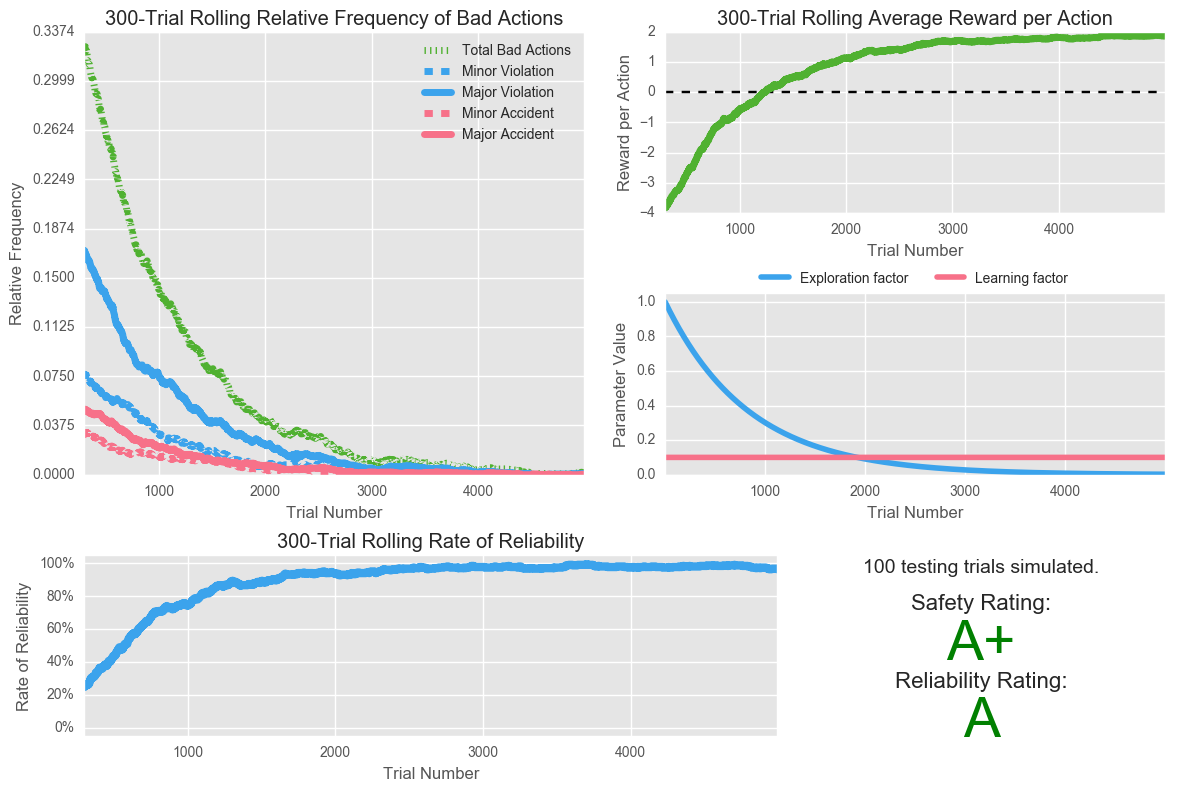

In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs3.plot_trials('final_sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** 
1) I chose convex decaying function, epsilon = exp(-0.0012 * t) because it outperformed the linear decaying function and concave decaying function on safety (good actions rate), while reliability performance metrics were very similar.   

2) A total of 4994 training trials ran before testing began.   

3) The learning rate alpha was set to 0.1. When other parameters were fixed, the agent with smaller alpha learned faster, especially the reliability. Epsilon-tolerance was set to .0025 to allow approximately 5000 training trials because with other parameters given, at about 5000th trials the good actions rate converge to 100% and reliability was stedily above 90%.  

4) The improved smartcab showed dramatically better results compared to the default Q-learner. Total bad actions decreased from 20% to 0%. Average reward of improved Q-learner converged to approximately 2.0, same as the reward when the action involves no traffic violation and accident free - big improvement from default Q-learner's -3.0. 

5) The Q-learner results suggest the agent successfully learned an appropriate polocy. 


6) The 100 testing trials results were A+ for safety rating, and A for reliability.   

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy? Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Here's some example policies (state, action) of US right-of-way traffic laws that out agent need to learn:  
`(('left', {'light': 'green', 'oncoming': 'forward', 'right': --, 'left': --}), None)`

`(('left', {'light': 'green', 'oncoming': 'right', 'right': --, 'left': --}), None)`  

`(('left', {'light': 'green', 'oncoming': 'left', 'right': --, 'left': --}), left)` 

`(('left', {'light': 'green', 'oncoming': 'None', 'right': --, 'left': --}), left)`  



In the Q-taable txt file, there were 16 states that the agent's waypoint is going left, the light at the intersection is green, and there were no oncoming traffic. The agent chose the correct policy, turning left, with 100% probability.  There were 16 cases of `(('left', {'light': 'green', 'oncoming': 'left', 'right': --, 'left': --}), left)`. The probability of correct action (left) was 75%.   


There were 16 cases of `{'left', {'light': 'green', 'oncoming': 'right', 'right': -- , 'left': -- }.` The agent did not learn the correct policy, wait - she chose to go forward eight times and to the right eight times. The agent learned not to turn left but she did not stop and wait, maybe because of the penalty on idling at green light. 

Similarly out of 14 cases of `{'left', {'light': 'green', 'oncoming': 'forward', 'right': -- , 'left': -- }.`, there were zero case that agent either turned left or waited. The agent chose to go forward six times and turn right eight times. 







-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

We defined the state as (waypoint, inputs). The inputs are how the agent sees the world - lights and how the cars around him are moving. The waypoint is where the agent is supposed to head in "next" step. The agent does not take into account how close he is to the destination, so he cannot consider future rewards in choosing his action. 

Assume we designed the scheme so that our agent takes into account future rewards. We still can't make sure the agent will choose action that will give the most future rewards, because we introduced various environmental randomness. Most importantly, agent's location and destination are randomly reset at the beginning of each trial, so is the L1 distance between the two. 





> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.